In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

### Load hexagons (resolution of 5)

In [3]:
# load hex grid 
hexgrid_res5 = gpd.read_file("../Data/hex_res5/")

In [4]:
# find centroid and area of each hex cell 
hexgrid_res5['centroid'] = hexgrid_res5.centroid
hexgrid_res5['area'] = hexgrid_res5.area

In [5]:
# avg cell size of H3 hexagon (res5)
np.mean(hexgrid_res5['area'] / (10**3)**2)

236.17268428954762

In [6]:
# avg cell size of ERA5 (Resolution: 11132 meters)
11132 ** 2  / (10**3)**2

123.921424

The average cell size of H3 hexagon (resolution = 5) is about 236 km^2, which is very close to the official documentation (https://h3geo.org/docs/core-library/restable/). The average cell size of ERA5 is about 123 km^2. That is, each H3 hexagon covers/overlaps with about 2 ERA5 cells. 

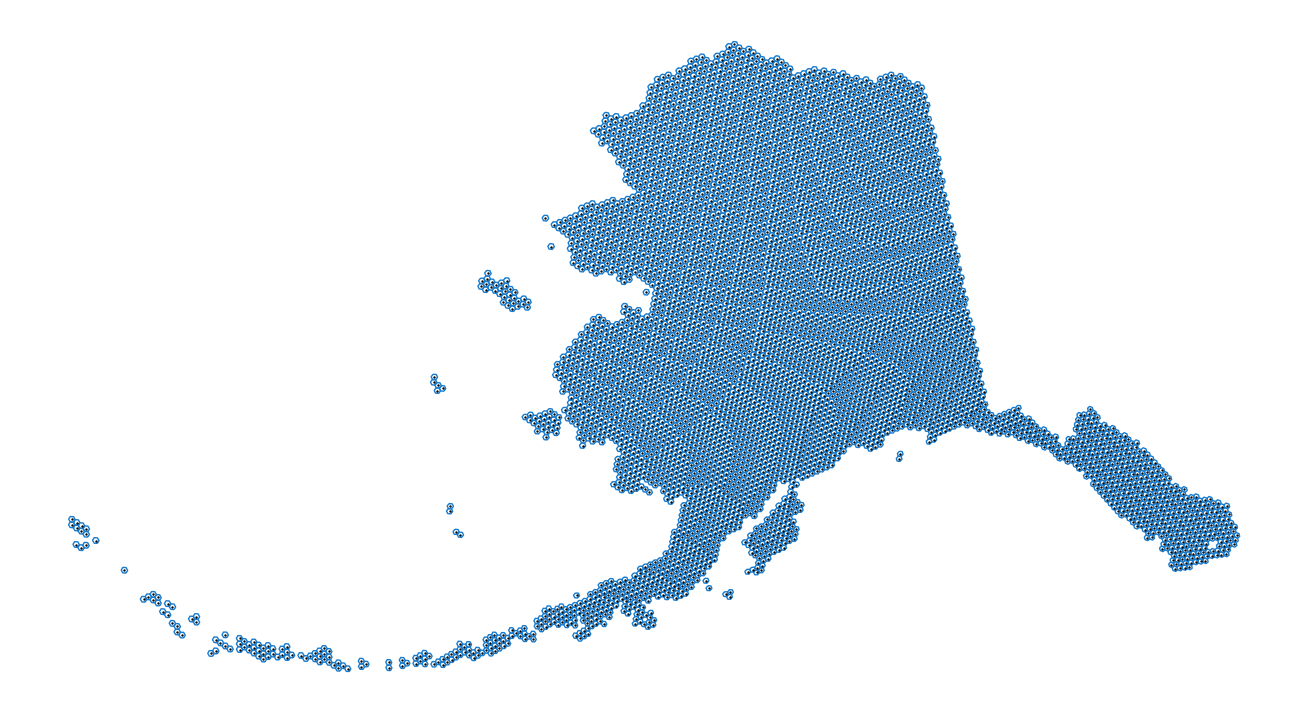

In [7]:
# visualize centroid and hexagon
fig, ax = plt.subplots(figsize=(21, 9))
hexgrid_res5['geometry'].plot(ax = ax, facecolor='none', edgecolor='#187bcd')
hexgrid_res5['centroid'].plot(ax = ax, facecolor='black', markersize = 0.5)
ax.set_axis_off()

### Load city info used in Heat Pump Calculator (HPC)

In [8]:
# load city info used in Heat Pump Calculator (HPC)
city_url = 'https://github.com/leungkp/akwlib-export/blob/main/data/v01/city.csv' + '?raw=true'
city_HPC = pd.read_csv(city_url)

In [9]:
# convert lat and long into a geometry / GDP object
geometry = [Point(xy) for xy in zip(city_HPC['Longitude'], city_HPC['Latitude'])]
city_HPC = gpd.GeoDataFrame(city_HPC, geometry = geometry, crs = 'epsg:4267')
city_HPC = city_HPC.to_crs('epsg:3338')

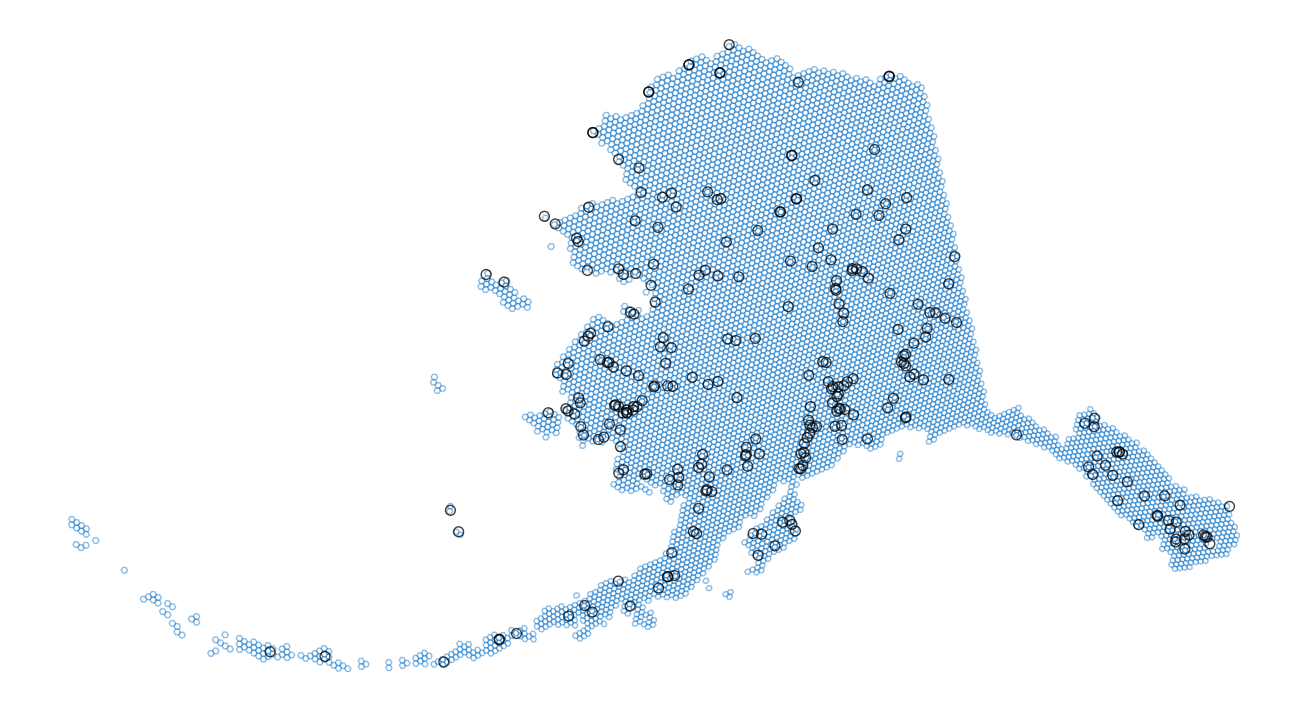

In [10]:
# visualize cities used in HPC and hexagons
fig, ax = plt.subplots(figsize=(21, 9))
hexgrid_res5['geometry'].plot(ax = ax, facecolor='none', edgecolor='#187bcd', alpha=0.5)
city_HPC.plot(ax = ax, facecolor='none', edgecolor="black", markersize = 50, alpha=0.75)
ax.set_axis_off()


### Spatial joining

In [13]:
hexgrid_res5_wCity = gpd.sjoin_nearest(hexgrid_res5, city_HPC, distance_col = "distance")
hexgrid_res5_wCity.head()

,hex_id,geometry,centroid,area,index_right,ID,Name,Latitude,Longitude,ERHRegionID,...,ElecUtilities,GasPrice,aris_city,census_city,census_area,ancsa_region,railbelt,hub,avg_elec_usage,distance
0,85225b83fffffff,"POLYGON ((-1702938.705 462412.945, -1712941.75...",POINT (-1707989.708 471378.765),2.604098e+08,1,2,Adak,51.848896,-176.635422,2,...,"[('Adak -TDX Residential', 677), ('Adak - TDX ...",NaN,Adak,Adak city,Aleutians West Census Area,Aleut,Affordable Energy Strategy Area,False,"[471.936998147, 423.45531781, 460.81549341, 42...",160216.085351
1,85225b97fffffff,"POLYGON ((-1717901.621 454568.537, -1727920.89...",POINT (-1722956.177 463543.720),2.610974e+08,1,2,Adak,51.848896,-176.635422,2,...,"[('Adak -TDX Residential', 677), ('Adak - TDX ...",NaN,Adak,Adak city,Aleutians West Census Area,Aleut,Affordable Energy Strategy Area,False,"[471.936998147, 423.45531781, 460.81549341, 42...",175249.475748
2,85225bc3fffffff,"POLYGON ((-1658094.660 468577.024, -1668056.37...",POINT (-1663140.921 477520.215),2.587822e+08,1,2,Adak,51.848896,-176.635422,2,...,"[('Adak -TDX Residential', 677), ('Adak - TDX ...",NaN,Adak,Adak city,Aleutians West Census Area,Aleut,Affordable Energy Strategy Area,False,"[471.936998147, 423.45531781, 460.81549341, 42...",115685.402710
3,85225b17fffffff,"POLYGON ((-1703127.139 497127.379, -1713114.52...",POINT (-1708164.412 506084.735),2.595666e+08,1,2,Adak,51.848896,-176.635422,2,...,"[('Adak -TDX Residential', 677), ('Adak - TDX ...",NaN,Adak,Adak city,Aleutians West Census Area,Aleut,Affordable Energy Strategy Area,False,"[471.936998147, 423.45531781, 460.81549341, 42...",164544.083151
4,85225b13fffffff,"POLYGON ((-1688110.709 487598.281, -1698089.65...",POINT (-1693151.066 496551.035),2.593108e+08,1,2,Adak,51.848896,-176.635422,2,...,"[('Adak -TDX Residential', 677), ('Adak - TDX ...",NaN,Adak,Adak city,Aleutians West Census Area,Aleut,Affordable Energy Strategy Area,False,"[471.936998147, 423.45531781, 460.81549341, 42...",147910.720187
